# Problem Set 2 - Liam Seper

## Question 1

In [1]:
import pandas as pd
import matplotlib.pyplot as pp
import numpy as np
from matplotlib_venn import venn3
import random

In [2]:
a = {'a', 'b', 'c', 'd'}
b = {'d', 'e', 'f', 'g', 'h'}
c = {'g', 'h', 'i', 'j', 'k'}
s = c.union(a, b)

### a.)

In [3]:
print(f"Set A: {a}")
print(f"Set B: {b}")
print(f"Set C: {c}")
print(f"Set S: {s}")

Set A: {'c', 'b', 'a', 'd'}
Set B: {'f', 'e', 'd', 'g', 'h'}
Set C: {'k', 'i', 'j', 'g', 'h'}
Set S: {'k', 'f', 'c', 'e', 'i', 'j', 'b', 'd', 'a', 'g', 'h'}


In [4]:
aC = s - a
bC = s - b
cC = s - c
sC = s - s

print(f"a complement = {aC}")
print(f"b complement = {bC}")
print(f"c complement = {cC}")
print(f"s complement = {sC}")

a complement = {'k', 'f', 'e', 'i', 'j', 'g', 'h'}
b complement = {'k', 'i', 'j', 'b', 'a', 'c'}
c complement = {'f', 'e', 'd', 'b', 'a', 'c'}
s complement = set()


### c.)

In [5]:
print(f"a union c = {a | c}")
print(f"c complement intersect a = {bC & a}")
print(f"a intersect b intersect c = {a & b & c}")
print(f"(a union b) intersect intersect c complement = {(a | b) & cC}")
print(f"a union b = {a | b}")
print(f"c intersect a complement = {c & aC}")
print(f"a union b union c = {a | b | c}")

a union c = {'g', 'k', 'd', 'i', 'b', 'j', 'a', 'c', 'h'}
c complement intersect a = {'c', 'b', 'a'}
a intersect b intersect c = set()
(a union b) intersect intersect c complement = {'f', 'e', 'd', 'b', 'a', 'c'}
a union b = {'g', 'f', 'e', 'd', 'b', 'a', 'c', 'h'}
c intersect a complement = {'k', 'i', 'j', 'g', 'h'}
a union b union c = {'g', 'f', 'k', 'e', 'd', 'i', 'b', 'j', 'a', 'c', 'h'}


## Question 2

### a.)

In [6]:
df = pd.read_csv("titanic3.csv")

numObservations = df.shape[0]
numVariables = df.shape[1]

print(f"Number of observations: {numObservations}")
print(f"Number of variables: {numVariables}\n")

print(f"The following features have NaN values for some observations:")
for name, data in df.iteritems():
    if(data.isna().values.any()):
        print(name)

Number of observations: 1309
Number of variables: 14

The following features have NaN values for some observations:
age
fare
cabin
embarked
boat
body
home.dest


### b.)

In [7]:
dfNoNA = df.drop(columns = ['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']).dropna(0)
print(f"There are {len(dfNoNA)} observations in the clean data")

There are 1046 observations in the clean data


### c.)

In [8]:
survived = dfNoNA[dfNoNA.survived == 1]
died = dfNoNA[dfNoNA.survived == 0]

male = dfNoNA[dfNoNA.sex == 'male']
female = dfNoNA[dfNoNA.sex == 'female']

class1 = dfNoNA[dfNoNA.passClass == 1]
class2 = dfNoNA[dfNoNA.passClass == 2]
class3 = dfNoNA[dfNoNA.passClass == 3]

def getSurvived(c):
    return round(len(c[c.survived == 1]) / len(c), 3), round(len(c[c.survived == 0]) / len(c), 3)

print(f"Number of passengers that survived: {len(survived)}")
print(f"Number of passengers that died: {len(died)}")

print(f"Number of passengers that were male: {len(male)}")
print(f"Number of passengers that were female: {len(female)}")

print(f"Number of passengers in class 1: {len(class1)}")
print(f"Number of passengers in class 2: {len(class2)}")
print(f"Number of passengers in class 3: {len(class3)}")

class1Survived = getSurvived(class1)
class2Survived = getSurvived(class2)
class3Survived = getSurvived(class3)
print(f"Proportion of 1st Class passengers who survived: {class1Survived[0]}, proportion that died: {class1Survived[1]}")
print(f"Proportion of 2nd Class passengers who survived: {class2Survived[0]}, proportion that died: {class2Survived[1]}")
print(f"Proportion of 3rd Class passengers who survived: {class3Survived[0]}, proportion that died: {class3Survived[1]}")

Number of passengers that survived: 427
Number of passengers that died: 619
Number of passengers that were male: 658
Number of passengers that were female: 388
Number of passengers in class 1: 284
Number of passengers in class 2: 261
Number of passengers in class 3: 501
Proportion of 1st Class passengers who survived: 0.637, proportion that died: 0.363
Proportion of 2nd Class passengers who survived: 0.441, proportion that died: 0.559
Proportion of 3rd Class passengers who survived: 0.261, proportion that died: 0.739


### d.)

In [9]:
numInClass23 = len(class2) + len(class3)
class2Died = class2[class2.survived == 0]
class3Died = class3[class3.survived == 0]

print(f"Fraction of passengers that did not survive: {round(len(died) / len(dfNoNA), 3)}")
malesSum = getSurvived(male)
print(f"Fraction of males that that did not survive: {round(malesSum[1], 3)}")
adults = dfNoNA[dfNoNA.age >= 18]
adultsSum = getSurvived(adults)
print(f"Fraction of adults that did not survive: {round(adultsSum[1], 3)}")
print(f"Proportion of 2nd and 3rd Class passengers that did not survive: {round((len(class2Died) + len(class3Died)) / numInClass23, 3)}")

Fraction of passengers that did not survive: 0.592
Fraction of males that that did not survive: 0.795
Fraction of adults that did not survive: 0.612
Proportion of 2nd and 3rd Class passengers that did not survive: 0.677


### e.)

In [10]:
def getProp(sub, l):
    return sub[l], round(len(sub[l]) / len(died), 3)

maleDied = getProp(died, died.sex == 'male')[0]
maleAdultDied = getProp(maleDied, maleDied.age >= 18)[1]
print(f"Proportion of those that did not survive that were adult males: {maleAdultDied}")
maleDied = getProp(died, died.sex == 'male')[0]
print(f"Proportion of those that did not survive that were male, and also in class 2 or 3: {getProp(maleDied, maleDied.passClass == 2)[1] + getProp(maleDied, maleDied.passClass == 3)[1]}")
adultDied = getProp(died, died.age >= 18)[0]
adultClassProp = getProp(adultDied, adultDied.passClass == 2)[1] + getProp(adultDied, adultDied.passClass == 3)[1]
print(f"Proportion of those that did not survive that were adults, and also in class 2 or 3: {round(adultClassProp, 3)}")
maleAdultDied = getProp(maleDied, maleDied.age >= 18)[0]
maleAdultDiedProp = getProp(maleAdultDied, maleAdultDied.passClass == 2)[1] + getProp(maleAdultDied, maleAdultDied.passClass == 3)[1]
print(f"Propotion of those that did not survive that were adult males, in class 2 or 3: {round(maleAdultDiedProp, 3)}")

Proportion of those that did not survive that were adult males: 0.763
Proportion of those that did not survive that were male, and also in class 2 or 3: 0.686
Proportion of those that did not survive that were adults, and also in class 2 or 3: 0.718
Propotion of those that did not survive that were adult males, in class 2 or 3: 0.606


### f.)

Text(0.5, 1.0, 'Titanic Victims')

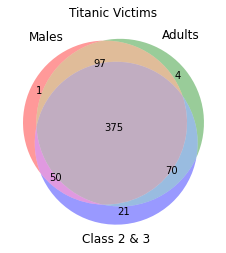

In [11]:
# categories: males, adults, 2 & 3 class
malesDied = set()
adultsDied = set()
twoThreeDied = set()

for i, row in died.iterrows():
    if(row.sex == 'male'):
        malesDied.add(i)
    if(row.age >= 18):
        adultsDied.add(i)
    if(row.passClass == 2 or row.passClass == 3):
        twoThreeDied.add(i)

venn3([malesDied, adultsDied, twoThreeDied], ['Males', 'Adults', 'Class 2 & 3'])
pp.title("Titanic Victims")

### g.)

In [12]:
maleSet = set()
adultSet = set()
classSet = set()
aliveSet = set()
total = dfNoNA.shape[0]
for i, row in dfNoNA.iterrows():
    if(row.sex == 'male'):
        maleSet.add(i)
    if(row.age >= 18):
        adultSet.add(i)
    if(row.passClass == 2 or row.passClass == 3):
        classSet.add(i)
    if(row.survived == 1):
        aliveSet.add(i)
        
print(f"Probability of being male, or an adult, or being in 2nd or 3rd class: {round(len(maleSet | adultSet | classSet) / total, 3)}")
print(f"Probability of not being male, or an adult, or being in 2nd or 3rd class: {round( 1 - len(maleSet | adultSet | classSet) / total, 3)}")
aliveGivenMale = (len(maleSet & aliveSet) / total) / (len(maleSet) / total)
print(f"Probanility of surviving given a passenger is male: {round(aliveGivenMale, 3)}")
aliveGivenAdult = (len(adultSet & aliveSet) / total) / (len(adultSet) / total)
print(f"Probability of surviving given a passenger is an adult: {round(aliveGivenAdult, 3)}")
aliveGivenClass = (len(classSet & aliveSet) / total) / (len(classSet) / total)
print(f"Probability of surviving given a passenger is in class 2 or 3: {round(aliveGivenClass, 3)}")

Probability of being male, or an adult, or being in 2nd or 3rd class: 0.992
Probability of not being male, or an adult, or being in 2nd or 3rd class: 0.008
Probanility of surviving given a passenger is male: 0.205
Probability of surviving given a passenger is an adult: 0.388
Probability of surviving given a passenger is in class 2 or 3: 0.323


## Question 3

### a.)

In [13]:
random.seed(101)

def flipCoin(n, p):
    arr = []
    numHeads = 0;
    numTails = 0;
    for i in range(n):
        result = random.random()
        if(result <= p):
            arr.append("heads")
            numHeads += 1
        else:
            arr.append("tails")
            numTails += 1
    return arr, numHeads, numTails

result = flipCoin(10, .6)
print(f'Flipping a coin 10 times yields the following vector: {result[0]}, with {result[1]} heads, and {result[2]} tails')

Flipping a coin 10 times yields the following vector: ['heads', 'heads', 'tails', 'tails', 'heads', 'tails', 'heads', 'heads', 'heads', 'tails'], with 6 heads, and 4 tails


### b.)

In [14]:
random.seed(101)

def rollDice(n, probs):
    DICE_SIDES = [1, 2, 3, 4, 5, 6]
    arr = []
    for i in range(n):
        arr.append(random.choices(DICE_SIDES, probs)[0])
    return arr

dice_probs = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
print(f"Result of rolling a fair die 30 times: {rollDice(30, dice_probs)}")

Result of rolling a fair die 30 times: [4, 2, 6, 6, 3, 4, 2, 2, 2, 5, 2, 6, 1, 2, 1, 5, 3, 3, 2, 4, 3, 2, 3, 2, 1, 5, 5, 4, 6, 3]


### c.)

In [15]:
random.seed(101)

def getPebbles(k, n, m):
    probs = [n / (n + m), m / (n + m)]
    options = ['white', 'black']
    arr = []
    for i in range(k):
        arr.append(random.choices(options, probs)[0])
    return arr

print(f"The results of choosing 5 pebbles with replacement were: {getPebbles(5, 2, 3)}")    

The results of choosing 5 pebbles with replacement were: ['black', 'white', 'black', 'black', 'black']


## Question 4

In [16]:
uA = [5, 3, 2]
uB = [2, 3, 5]

pUA = 0.5
pUB = 0.5
colors = {"red" : 0, "blue" : 1, "green" : 2}

def getUrnProb(uA, uB, pUA, pUB, obs):
    pXUA = uA[obs] / np.sum(uA)
    pXUB = uB[obs] / np.sum(uB)
    return (pXUA * pUA) / ((pXUA * pUA) + (pXUB * pUB))

def getSequence(seq, uA, uB, pUA, pUB):
    for obs in seq:
        pUA = getUrnProb(uA, uB, pUA, pUB, obs)
        pUB = (1 - pUA)
    return pUA

pUAResult = getSequence([colors["red"], colors["red"]], uA, uB, pUA, pUB)
pUBResult = 1 - pUAResult
print(f"2 red pebbles are picked sequentially. The final probabilities are: Urn A: {round(pUAResult, 3)} -- UrnB: {round(pUBResult, 3)}")

pUAResult = getSequence([colors["red"], colors["red"], colors["red"]], uA, uB, pUA, pUB)
pUBResult = 1 - pUAResult
print(f"3 red pebbles are picked sequentially. The final probabilities are: Urn A: {round(pUAResult, 3)} -- UrnB: {round(pUBResult, 3)}")

pUAResult = getSequence([colors["red"], colors["red"], colors["blue"], colors["green"], colors["blue"], colors["red"]], uA, uB, pUA, pUB)
pUBResult = 1 - pUAResult
print(f"The pebble sequence \"red, red, blue, green, blue, red\" is chosen. The final probabilities are: Urn A: {round(pUAResult, 3)} -- UrnB: {round(pUBResult, 3)}")

2 red pebbles are picked sequentially. The final probabilities are: Urn A: 0.862 -- UrnB: 0.138
3 red pebbles are picked sequentially. The final probabilities are: Urn A: 0.94 -- UrnB: 0.06
The pebble sequence "red, red, blue, green, blue, red" is chosen. The final probabilities are: Urn A: 0.862 -- UrnB: 0.138


## Question 5

Insert math here

Insert tree image here

In [17]:
pDrunk = .001
pSober = 1 - pDrunk

pPosDrunk = .99
pPosSober = .05

# p(s | +) = (p(s) * p(+ | s)) / p(+))

pSoberPos = pSober * pPosSober / ((pPosSober * pSober) + (pPosDrunk * pDrunk))
print(f"The probability of a driver being sober given that they have a positive test: {round(pSoberPos, 3)}")

The probability of a driver being sober given that they have a positive test: 0.981


## Question 6

The logical fallacy present here is that they did not factor in that OJ's wife was already murdered. Then, the actual probability that we should use is P(murdered by abuser | murdered) which would be $\displaystyle \frac{Murdered_{Abuser}}{Murdered_{Total}} = \frac{40}{45} = 0.89$